In [1]:
import os
import sys
import datetime as dt

import numpy as np
import pandas as pd
from scipy import stats, constants
from scipy.special import comb, perm, factorial, expit
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fp_list_master = ['C:', 'Users', 'szahn', 'Dropbox', 'Statistics & Machine Learning', 'coursera_ml_notes']
fp = os.sep.join(fp_list_master)
fp_fig = fp + os.sep + 'LaTeX Notes' + os.sep + 'Figures'
print(os.path.isdir(fp), os.path.isdir(fp_fig))

True True


In [5]:
_ = ((100 * 100) ** 2) / 2
print('{:,}'.format(_))

50,000,000.0


In [9]:
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

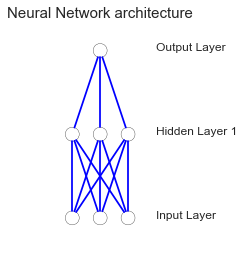

In [16]:
network = DrawNN( [3, 3, 1] )
network.draw()
# plt.savefig(fp_fig + os.sep + 'nn_repr_3_layer_neural_netw.pdf')

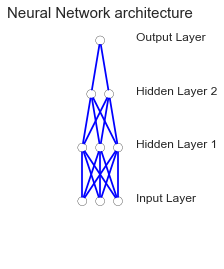

In [17]:
network = DrawNN( [3, 3, 2, 1] )
network.draw()
#plt.savefig(fp_fig + os.sep + 'nn_repr_4_layer_neural_netw.pdf')

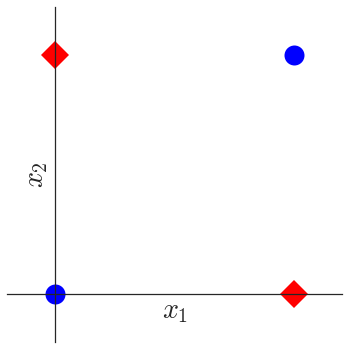

In [30]:
x1 = [0, 1]
y1 = [0, 1]

x2 = [1, 0]
y2 = [0, 1]


with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x1, y1, 'bo', markersize=20)
    plt.plot(x2, y2, 'rD', markersize=20)
    
    
    #plt.plot(x_list_reg, y_list_reg, 'b-', linewidth=4)
    plt.xlabel("$x_1$", fontsize=28)
    plt.ylabel('$x_2$', fontsize=28)
    plt.yticks([])
    plt.xticks([])
    plt.ylim(-0.2, 1.2)
    plt.xlim(-0.2, 1.2)
    
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    #ax.spines['left'].set_smart_bounds(True)
    #ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    
    plt.savefig(fp_fig + os.sep + 'nn_repr_eg_intuit_1_sample_data_1.pdf')